In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv("/content/breast-cancer.csv")
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           272 non-null    object 
 1   mefalsepause  272 non-null    object 
 2   tumor-size    0 non-null      float64
 3   inv-falsedes  272 non-null    object 
 4   falsede-caps  264 non-null    object 
 5   deg-malig     272 non-null    int64  
 6   breast        272 non-null    object 
 7   breast-quad   271 non-null    object 
 8   irradiat      272 non-null    bool   
 9   class         272 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 19.5+ KB


In [ ]:
for i in df.select_dtypes(include=["object"]).columns:
  print(i)

age
mefalsepause
inv-falsedes
falsede-caps
breast
breast-quad
class


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df.select_dtypes(include=["object"]).columns:
  df[i]= label.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           272 non-null    int64  
 1   mefalsepause  272 non-null    int64  
 2   tumor-size    0 non-null      float64
 3   inv-falsedes  272 non-null    int64  
 4   falsede-caps  272 non-null    int64  
 5   deg-malig     272 non-null    int64  
 6   breast        272 non-null    int64  
 7   breast-quad   272 non-null    int64  
 8   irradiat      272 non-null    bool   
 9   class         272 non-null    int64  
dtypes: bool(1), float64(1), int64(8)
memory usage: 19.5 KB


In [19]:
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,False,1
1,3,0,2,0,0,1,1,0,False,0
2,3,0,6,0,0,2,0,1,False,1
3,2,2,6,0,1,3,1,1,True,0
4,2,2,5,4,1,2,0,4,False,1
...,...,...,...,...,...,...,...,...,...,...
267,3,0,5,5,1,2,0,1,False,0
268,3,2,4,4,1,2,0,1,True,0
269,1,2,5,5,1,2,1,4,False,0
270,3,2,2,0,0,2,1,1,False,0


In [20]:
sample  = df['deg-malig'].sample(frac = 0.05)

In [22]:
from scipy import stats

In [56]:
def chi(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] <0.02 else False

In [57]:
chi(df['age'],df['class'])

False

In [30]:
import pandas as pd
import scipy.stats as stats

def chi_square_test(d1,d2):

    contingency_table = pd.crosstab(df["age"], df["class"])

    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    return {
        "Chi-Square Statistic": chi2_stat,
        "P-Value": p_value,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected
    }




{'Chi-Square Statistic': np.float64(4.046529147486984), 'P-Value': np.float64(0.5427365429670857), 'Degrees of Freedom': 5, 'Expected Frequencies': array([[ 0.70220588,  0.29779412],
       [23.875     , 10.125     ],
       [61.09191176, 25.90808824],
       [63.90073529, 27.09926471],
       [37.21691176, 15.78308824],
       [ 4.21323529,  1.78676471]])}


<ipython-input-74-905f1bcce9d7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




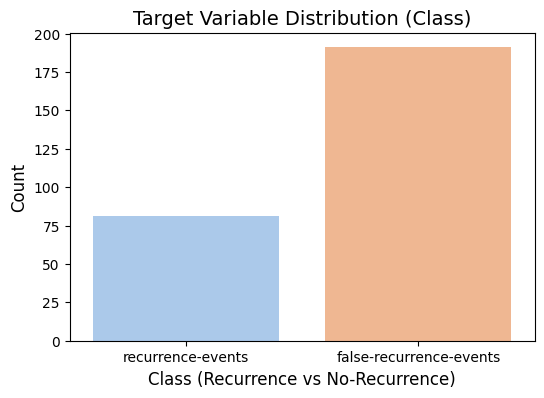

<ipython-input-74-905f1bcce9d7>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




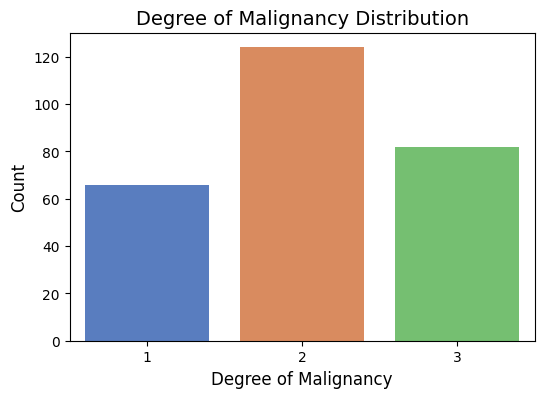

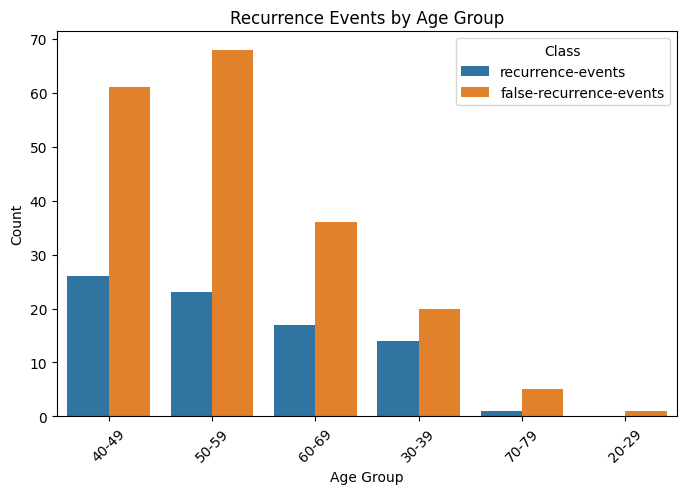

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class', palette='pastel')
plt.title('Target Variable Distribution (Class)', fontsize=14)
plt.xlabel('Class (Recurrence vs No-Recurrence)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='deg-malig', palette='muted')
plt.title('Degree of Malignancy Distribution', fontsize=14)
plt.xlabel('Degree of Malignancy', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="age", hue="class", data=df)
plt.title("Recurrence Events by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()